In [1]:
import numpy as np
import os
from ddlraw import Raw
from mea_256 import dic
import ddlsorters

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
20:11:09 [I] klustakwik KlustaKwik2 version 0.2.6


In [2]:
recording_name = '20160415_patch2'
Dir = os.path.join('C:/Users/liuxj/Desktop/BMEMajor/zhuanyeshijianzonghexunlian2/raw_data',recording_name)
file_name = 'patch_2_MEA.raw'
offset=1871
data = np.memmap(os.path.join(Dir,file_name),dtype='uint16',offset=offset,mode='r')
data = data.reshape(len(data)//256,256)
#选取前64个电极、前10s数据
data = data[1:100000,0:64]
data = data.astype('float32')
time_series = np.array(data)
np.save('raw_data.npy',time_series)
Fs = 20000
raw = Raw(time_series,Fs)
raw.scale(1,-2**15-1)
raw.scale(0.1042,0)
raw.set_unit('uV')
#设置电极位置，电极位置信息来自mea_256
locs = [(dic[i]+[0]) for i in range(raw.n_channels)]
raw.set_channels_locs(np.array(locs))
np.save('channels_locs.npy',np.array(locs))
#滤波
raw = raw.get_spikes()

Use cache_folder=C:\Users\liuxj\AppData\Local\Temp\spikeinterface_cache\tmpin2xlear\recording
write_binary_recording with n_jobs 1  chunk_size None
Binary file is not a .dat file. Making a copy!
RUNNING SHELL SCRIPT: tmp_KL\run_klusta.bat


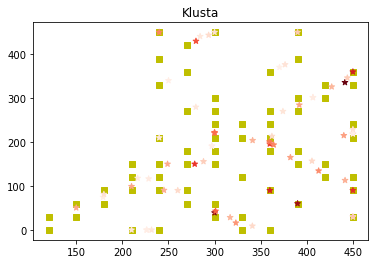

Use cache_folder=C:\Users\liuxj\AppData\Local\Temp\spikeinterface_cache\tmptflrn3jn\recording
write_binary_recording with n_jobs 1  chunk_size None
RUNNING SHELL SCRIPT: tmp_Spy\run_spykingcircus.bat


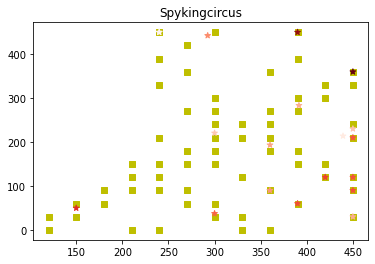

In [3]:
#比较各种方法的计算结果
neurons = []
for sortername in ['Klusta','Spykingcircus']:
    neurons += [raw.sort_by(sortername)]
    neurons[-1].plot_neurons_locs('all',sortername)
    #neurons.plot_neurons_spikes()

In [4]:
#计算gamma值矩阵
gamma = ddlsorters.compare_sorter_results(neurons[0],neurons[1],'Klusta','Spykingcircus')

0 2 0.8349392786306244
当前神经元ID为Klusta 0
在2个通道上被记录到


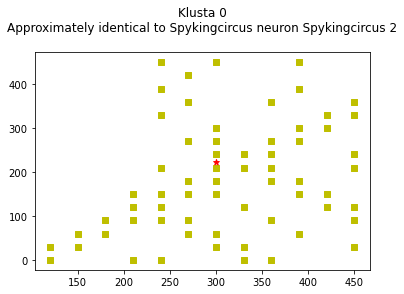

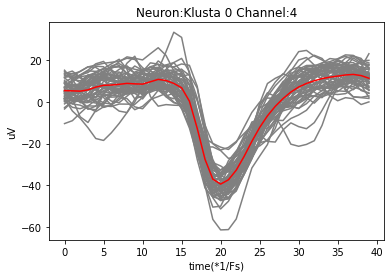

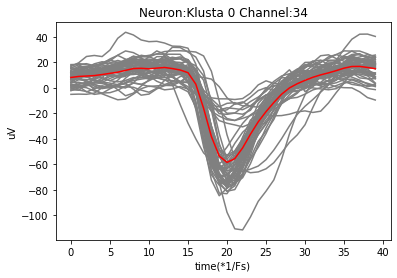

当前神经元ID为Spykingcircus 2
在2个通道上被记录到


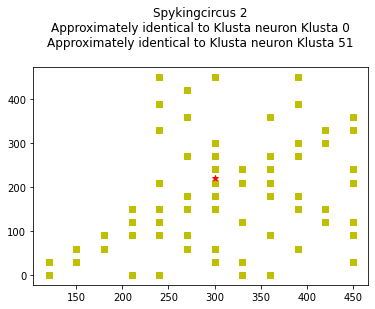

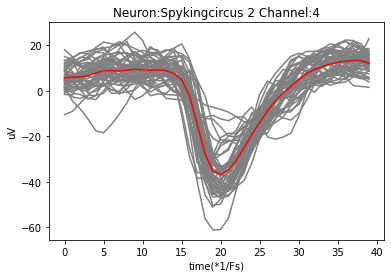

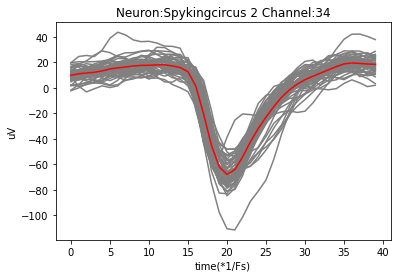

3 9 0.8938512570176532
当前神经元ID为Klusta 3
在1个通道上被记录到


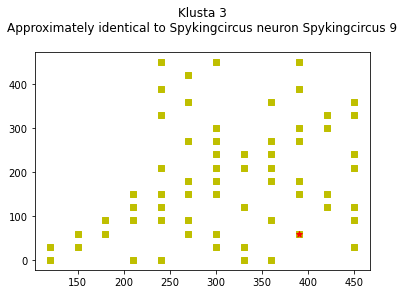

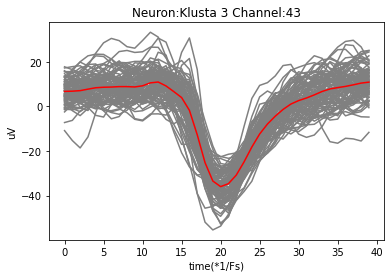

当前神经元ID为Spykingcircus 9
在1个通道上被记录到


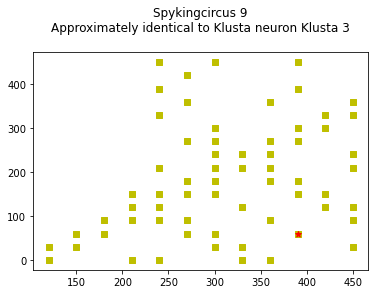

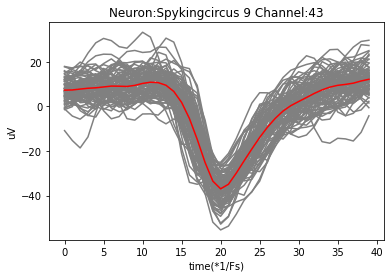

4 4 0.9142857142857144
当前神经元ID为Klusta 4
在1个通道上被记录到


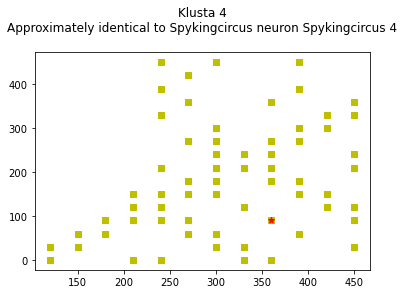

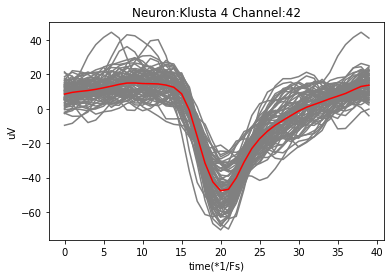

当前神经元ID为Spykingcircus 4
在1个通道上被记录到


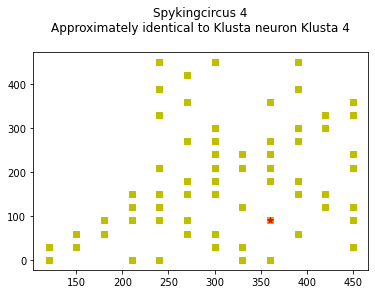

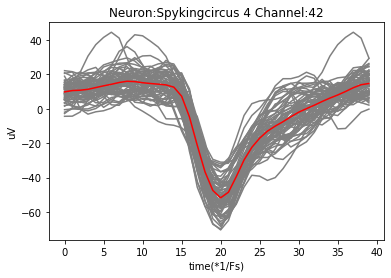

10 1 0.898876404494382
当前神经元ID为Klusta 10
在2个通道上被记录到


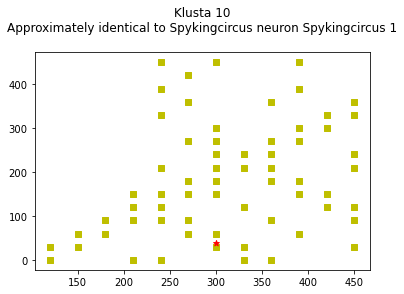

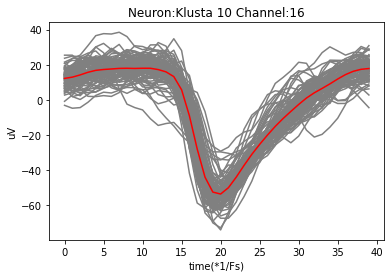

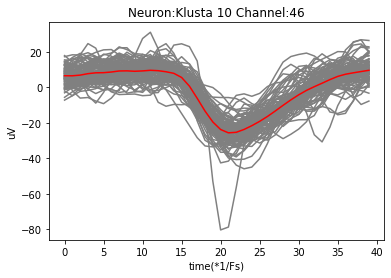

当前神经元ID为Spykingcircus 1
在2个通道上被记录到


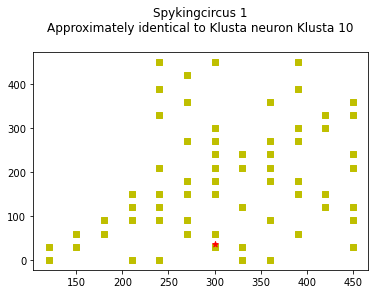

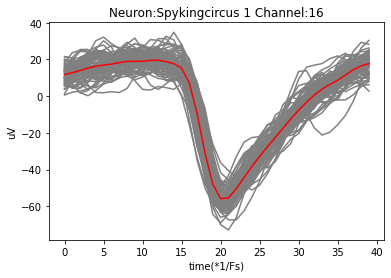

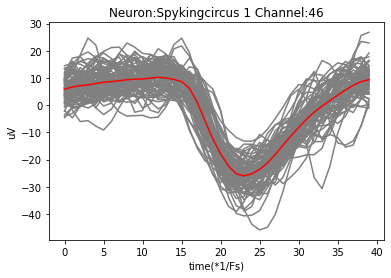

47 5 0.9863013698630135
当前神经元ID为Klusta 47
在3个通道上被记录到


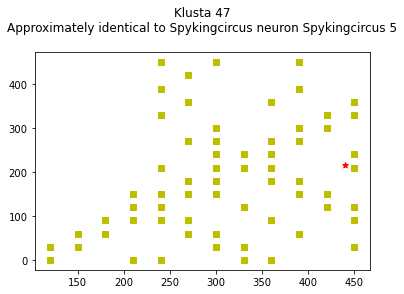

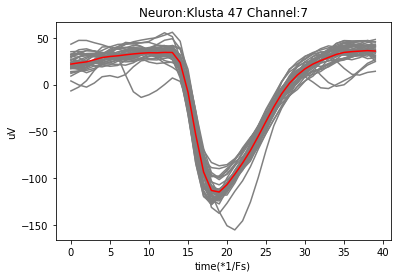

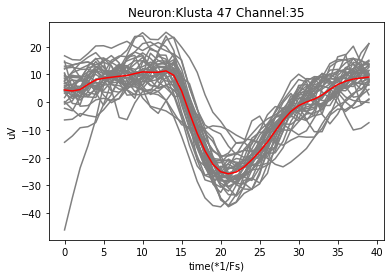

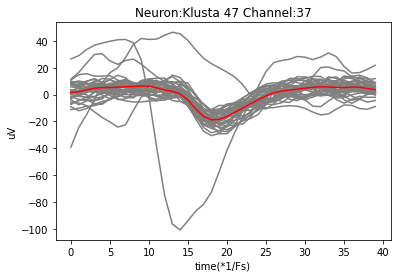

当前神经元ID为Spykingcircus 5
在3个通道上被记录到


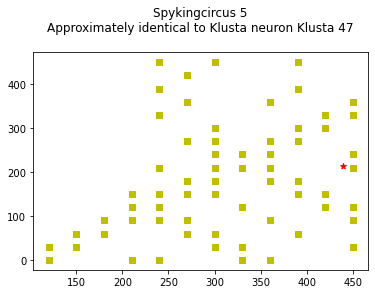

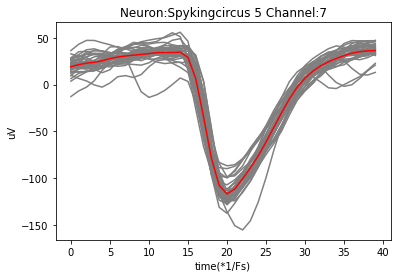

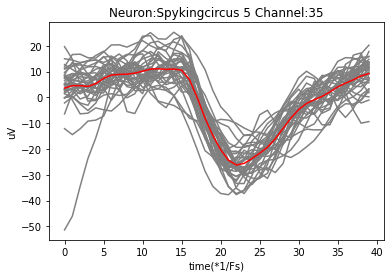

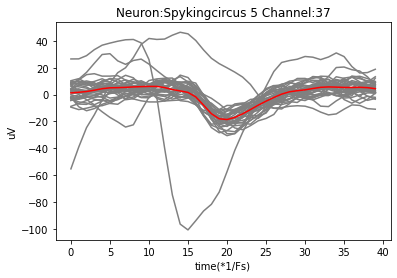

51 2 0.970873786407767
当前神经元ID为Klusta 51
在2个通道上被记录到


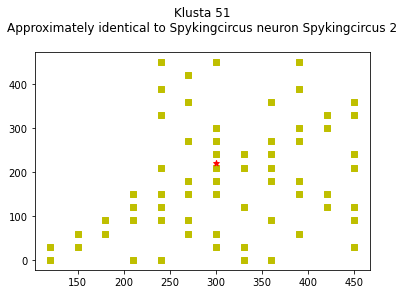

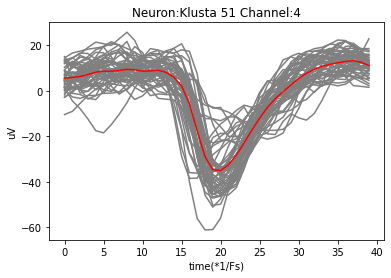

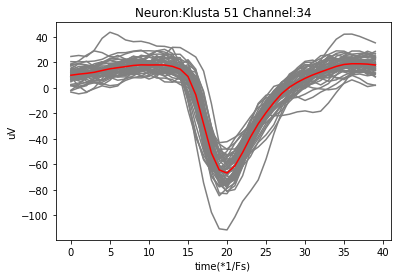

当前神经元ID为Spykingcircus 2
在2个通道上被记录到


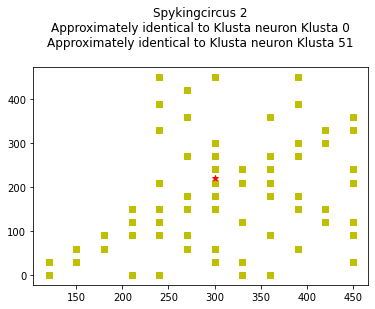

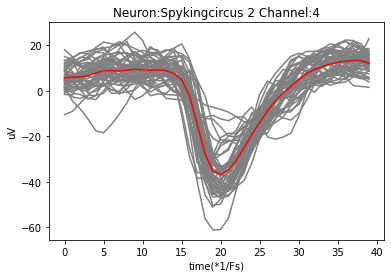

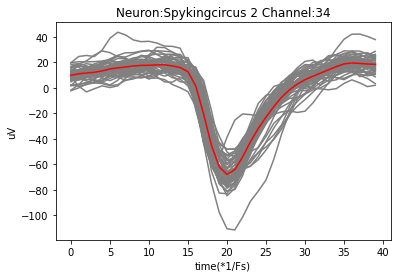

In [8]:
#绘制两种分类器得到的一致度最高的一些神经元
for i in range(np.shape(gamma)[0]):
    for j in range(np.shape(gamma)[1]):
        if gamma[i][j] >=0.8:
            print(i,j,gamma[i][j])
            neurons[0].plot_neurons_spikes(i)
            neurons[1].plot_neurons_spikes(j)